In [78]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, execute

from qiskit.tools.visualization import circuit_drawer, plot_histogram

q = QuantumRegister(4, 'q') 
tmp = QuantumRegister(1, 'tmp')
res = ClassicalRegister(4, 'res')

In [79]:
secret = 14 # 1110
oracle = QuantumCircuit(q, tmp, res)
for i in range(len(q)):
    if (secret & (1 << i)):
        oracle.cx(q[i], tmp[0])
circuit_drawer(oracle)

In [80]:
bv = QuantumCircuit(q, tmp, res)
bv.x(tmp) # flip the tmp qubit
bv.barrier(q) # for a nicer diagram
bv.h(q) # add a full layer of hadamard gates to the q qubits
bv.h(tmp) # and add a hadamard to tmp
bv.barrier() 
bv += oracle # add the oracle to the bv curcuit
bv.barrier()
circuit_drawer(bv)

In [81]:
bv.h(q) # full layer of hadamard
bv.h(tmp) # hadamard on tmp qubit which is then discarded
bv.measure(q, res) # measure the q qubits
circuit_drawer(bv)

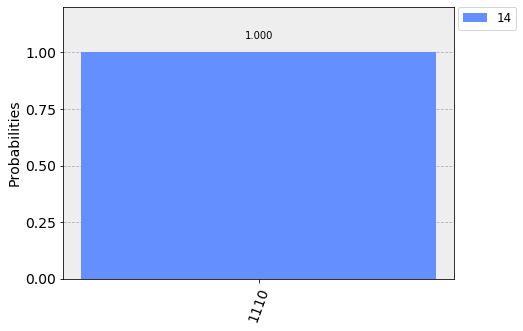

In [82]:
sim = Aer.get_backend('qasm_simulator')
job = execute(bv, sim, shots=1000)
count = job.result().get_counts()
plot_histogram(count, legend=[str(secret)])

In [83]:
from qiskit import IBMQ
IBMQ.save_account('YOUR_API_TOKEN')

In [87]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [88]:
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [89]:
backend = provider.get_backend('ibmq_essex')

In [90]:
job_cloud = execute(bv, backend, shots=1000)

In [91]:
count_cloud = job_cloud.result().get_counts()
print(count_cloud)

{'0010': 65, '1100': 55, '1101': 39, '0000': 65, '1000': 23, '1111': 166, '1010': 50, '0011': 45, '0111': 41, '1001': 19, '0101': 25, '0100': 31, '1110': 238, '0110': 46, '1011': 34, '0001': 58}


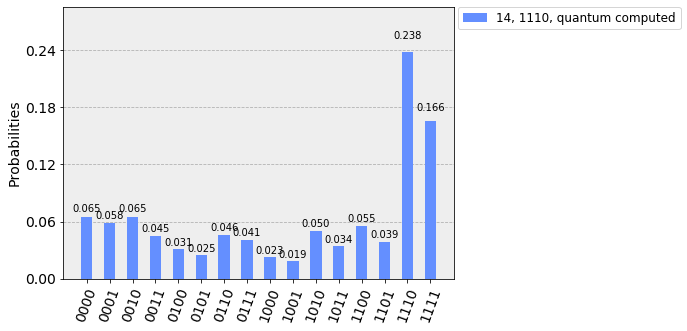

In [92]:
plot_histogram(count_cloud, legend=['14, 1110, quantum computed'])